## Kepler Dataset

In [188]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from sklearn import linear_model

## Reading the data

In [189]:
kepler = pd.read_csv("Ex01_Kepler_Regression.csv")

## Features Transformation 

In [190]:
kepler.planet = pd.Categorical(kepler.planet).codes

In [191]:
kepler = kepler.drop('planet', axis=1)

In [192]:
kepler = kepler.apply(lambda x: np.log(x))

## Scatter Plots

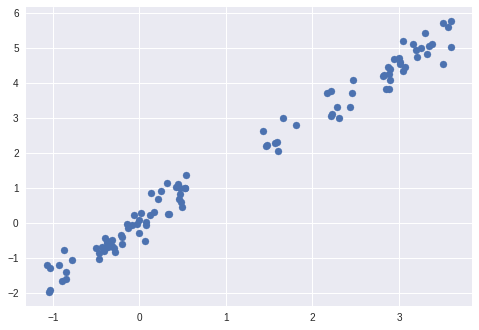

In [52]:
plt.scatter(kepler['SemiMajorAxis'], kepler['OrbitalPeriod'])
plt.show()

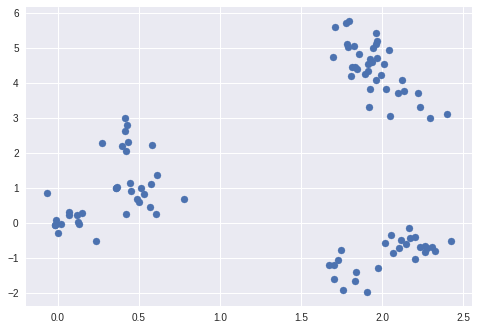

In [53]:
plt.scatter(kepler['Volume'], kepler['OrbitalPeriod'])
plt.show()

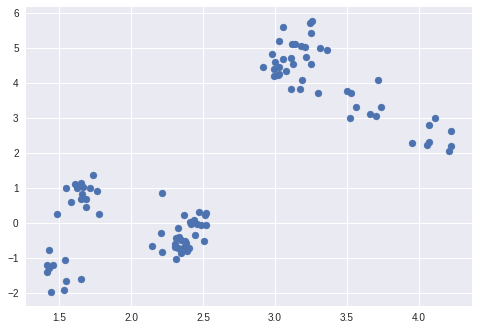

In [54]:
plt.scatter(kepler['EscapeVelocity'], kepler['OrbitalPeriod'])
plt.show()

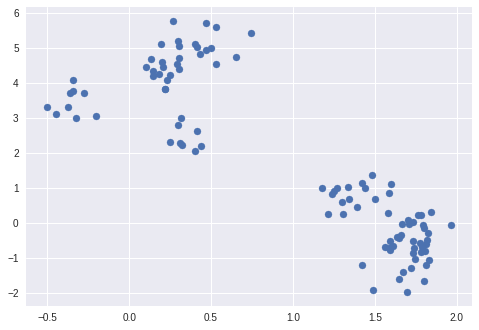

In [55]:
plt.scatter(kepler['Density'], kepler['OrbitalPeriod'])
plt.show()

## Feature Corelation Matrix

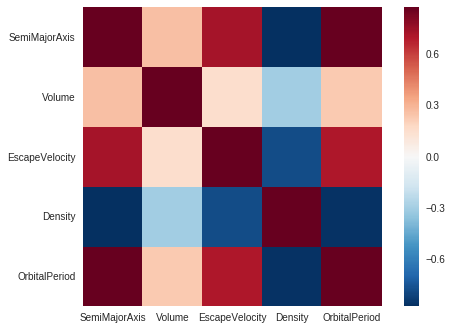

In [56]:
kepler_corr = kepler.corr()
sns.heatmap(kepler_corr, vmax=.8, square=True)
plt.show()

## Training and Test Datasets

Training Set

In [247]:
train_kepler = kepler[:int(0.6*len(kepler))]
x_train = train_kepler.drop('OrbitalPeriod', axis = 1)
y_train = train_kepler[['OrbitalPeriod']]

Test Set

In [248]:
test_kepler = kepler[int(0.6*len(kepler)):]
x_test = test_kepler.drop('OrbitalPeriod', axis = 1)
y_test = np.array(test_kepler[['OrbitalPeriod']])

## Normalising the Dataset

In [249]:
x_train_std = np.array((x_train - x_train.mean())/x_train.std())
y_train_std = np.array((y_train - y_train.mean())/y_train.std())
x_test_std = np.array((x_test - x_test.mean())/x_test.std())

## Linear Regression Model

In [250]:
linear_reg = linear_model.LinearRegression(normalize=True)
linear_reg.fit(x_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [251]:
linear_coeff = linear_reg.coef_

In [252]:
linear_intercept = linear_reg.intercept_

In [253]:
linear_predicted = linear_reg.predict(x_test_std)
linear_predicted = (linear_predicted * y_test.std()) + y_test.mean()

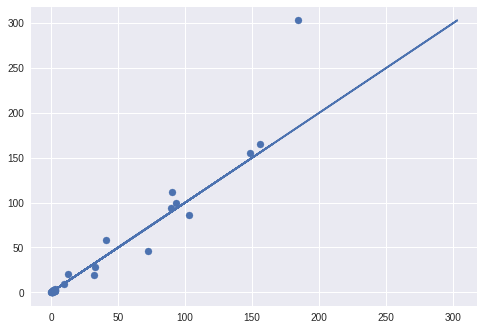

In [254]:
plt.scatter(np.exp(linear_predicted), np.exp(y_test))
plt.plot(np.exp(y_test), np.exp(y_test))
plt.show()

In [255]:
linear_residuals = np.exp(linear_predicted) - np.exp(y_test)
linear_residuals_df = pd.DataFrame(linear_residuals)

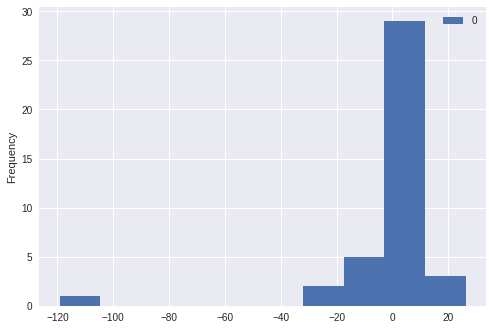

In [256]:
linear_residuals_df.plot(kind = 'hist')
plt.show()

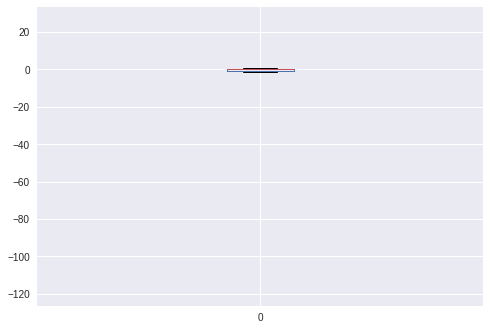

In [257]:
linear_residuals_df.plot(kind = 'box')
plt.show()

## Linear Regression Model - Lasso

In [258]:
alphas = np.linspace(0.00001,1,1000)*0.5

In [259]:
lasso_model = linear_model.Lasso(max_iter=10000, normalize=True)
lasso_coeff = []

for a in alphas:
    lasso_model.set_params(alpha = a)
    lasso_model.fit(x_train_std, y_train_std)
    lasso_coeff.append(lasso_model.coef_)

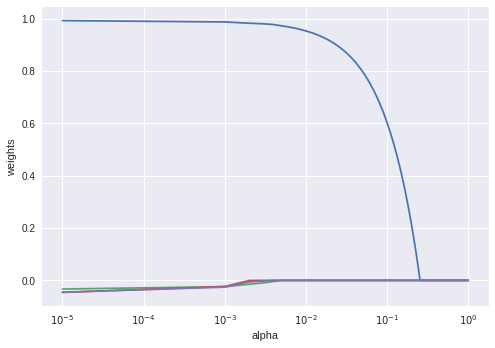

In [260]:
ax = plt.gca()
ax.plot(2*alphas, lasso_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [261]:
y_train_std = y_train_std.reshape(60,)
lassocv = linear_model.LassoCV(alphas = alphas, cv=10, max_iter=100000, normalize=True)
lassocv.fit(x_train_std, y_train_std)

LassoCV(alphas=array([  5.00000e-06,   5.05495e-04, ...,   4.99500e-01,   5.00000e-01]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [262]:
lasso_model.set_params(alpha=lassocv.alpha_)
lasso_model.fit(x_train_std, y_train_std)

Lasso(alpha=5.0000000000000004e-06, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [263]:
lasso_predicted = lasso_model.predict(x_test_std)
lasso_predicted = lasso_predicted.reshape(40,1)
lasso_predicted = (lasso_predicted * y_test.std()) + y_test.mean()

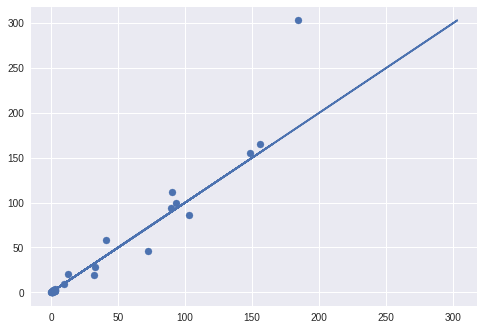

In [264]:
plt.scatter(np.exp(lasso_predicted), np.exp(y_test))
plt.plot(np.exp(y_test), np.exp(y_test))
plt.show()

In [265]:
lasso_residuals = np.exp(lasso_predicted) - np.exp(y_test)
lasso_residuals_df = pd.DataFrame(lasso_residuals)

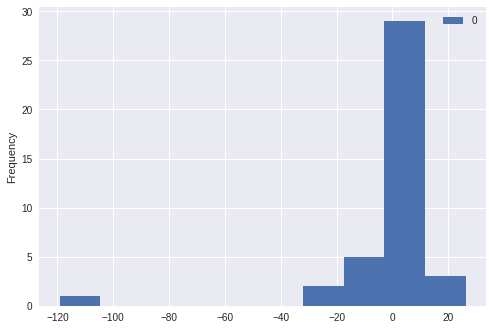

In [266]:
lasso_residuals_df.plot(kind = 'hist')
plt.show()

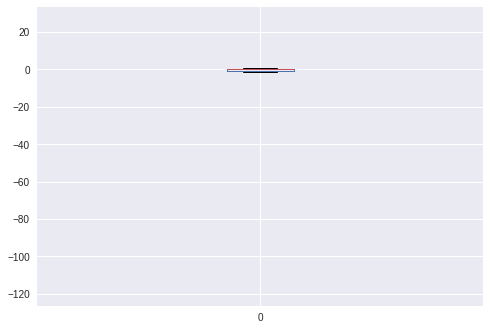

In [267]:
lasso_residuals_df.plot(kind = 'box')
plt.show()

## Linear Regression Model - Ridge Regression

In [268]:
alphas = np.linspace(0.001,50,1000)*0.5

In [269]:
ridge_model = linear_model.Ridge(normalize = True)
ridge_coeff = []
for a in alphas:
    ridge_model.set_params(alpha = a)
    ridge_model.fit(x_train_std, y_train_std)
    ridge_coeff.append(ridge_model.coef_)

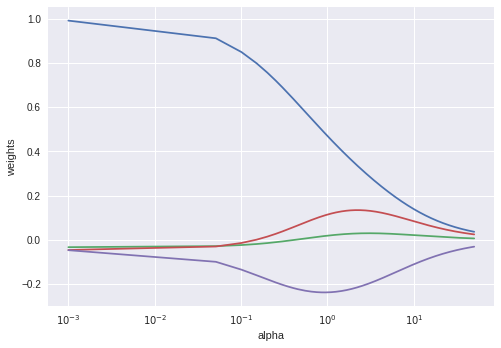

In [270]:
ax = plt.gca()
ax.plot(alphas*2, ridge_coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [271]:
ridgecv = linear_model.RidgeCV(alphas = alphas, normalize=True)
ridgecv.fit(x_train_std, y_train_std)

RidgeCV(alphas=array([  5.00000e-04,   2.55245e-02, ...,   2.49750e+01,   2.50000e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False)

In [272]:
ridge_model.set_params(alpha = ridgecv.alpha_)
ridge_model.fit(x_train_std, y_train_std)

Ridge(alpha=0.00050000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [273]:
ridge_predicted = ridge_model.predict(x_test_std)
ridge_predicted = ridge_predicted.reshape(40,1)
ridge_predicted = (ridge_predicted * y_test.std()) + y_test.mean()

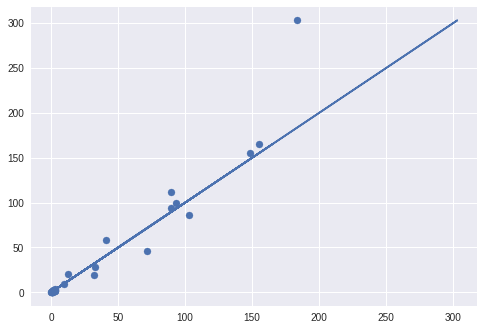

In [274]:
plt.scatter(np.exp(ridge_predicted), np.exp(y_test))
plt.plot(np.exp(y_test), np.exp(y_test))
plt.show()

In [275]:
ridge_residuals = np.exp(ridge_predicted) - np.exp(y_test)
ridge_residuals_df = pd.DataFrame(ridge_residuals)

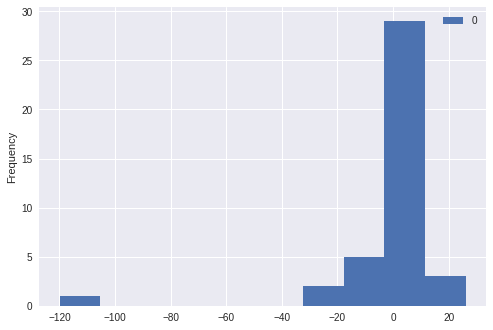

In [276]:
ridge_residuals_df.plot(kind = 'hist')
plt.show()

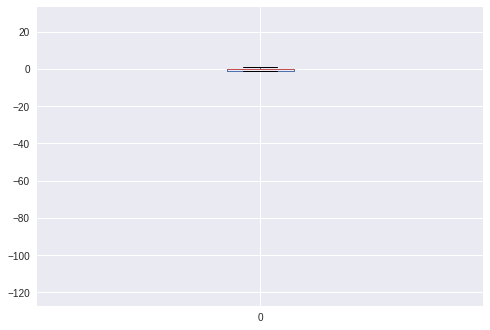

In [283]:
ridge_residuals_df.plot(kind = 'box')
plt.show()